Descriptive Statistics:
count: 11
mean: 14.181818181818182
median: 14.0
mode: [12]
standard_deviation: 2.600699206681996
variance: 6.763636363636363
min: 11
max: 19
range: 8
25th_percentile: 12.0
50th_percentile (median): 14.0
75th_percentile: 15.5
interquartile_range (IQR): 3.5
skewness: 0.7576539810771815

Descriptive Statistics for DataFrame:
count: A    11
B    11
dtype: int64
mean: A    14.181818
B    24.000000
dtype: float64
median: A    14.0
B    24.0
dtype: float64
mode: None
standard_deviation: A    2.600699
B    2.828427
dtype: float64
variance: A    6.763636
B    8.000000
dtype: float64
min: A    11
B    20
dtype: int64
max: A    19
B    29
dtype: int64
range: A    8
B    9
dtype: int64
25th_percentile: A    12.0
B    22.0
Name: 0.25, dtype: float64
50th_percentile (median): A    14.0
B    24.0
Name: 0.5, dtype: float64
75th_percentile: A    15.5
B    25.5
Name: 0.75, dtype: float64
interquartile_range (IQR): A    3.5
B    3.5
dtype: float64
skewness: A    0.757654
B    0.48

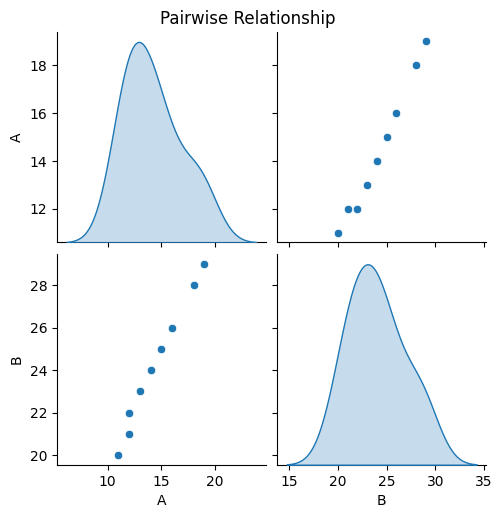

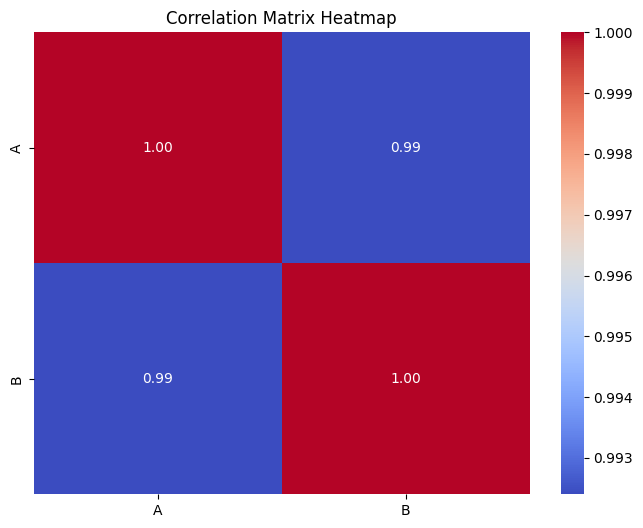

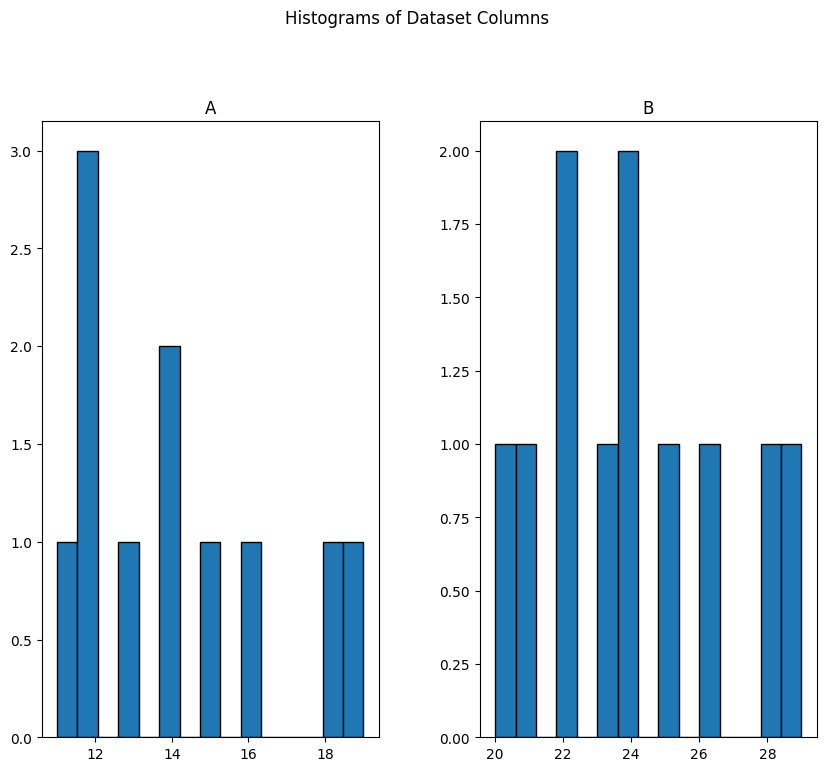

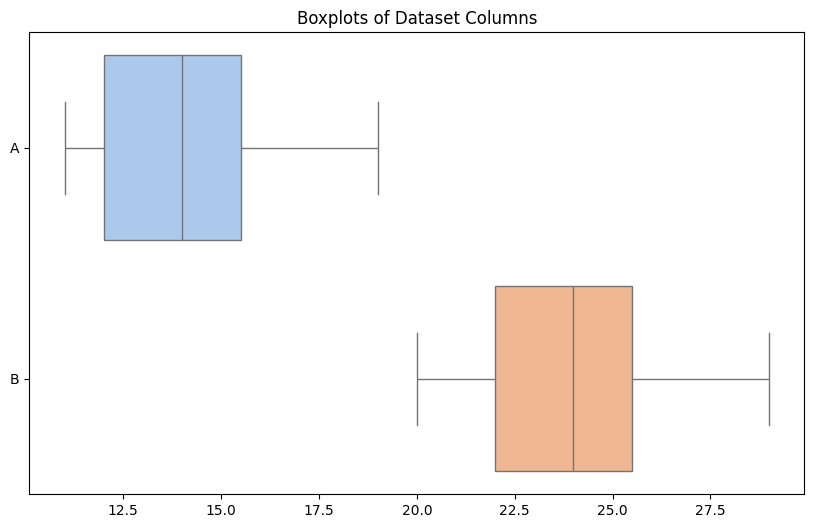

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def descriptive_statistics(data):

    if isinstance(data, (list, np.ndarray)):
        data = pd.Series(data)

    stats = {
        'count': data.count(),
        'mean': data.mean(),
        'median': data.median(),
        'mode': data.mode().tolist() if isinstance(data, pd.Series) and not data.mode().empty else None,
        'standard_deviation': data.std(),
        'variance': data.var(),
        'min': data.min(),
        'max': data.max(),
        'range': data.max() - data.min(),
        '25th_percentile': data.quantile(0.25),
        '50th_percentile (median)': data.quantile(0.5),
        '75th_percentile': data.quantile(0.75),
        'interquartile_range (IQR)': data.quantile(0.75) - data.quantile(0.25),
        'skewness': data.skew(),
    }

    # For correlations and covariances if input is a DataFrame
    if isinstance(data, pd.DataFrame):
        stats.update({
            'correlation_matrix': data.corr().to_dict(),
            'covariance_matrix': data.cov().to_dict(),
        })

    return stats

def visualize(data):
  if not isinstance(data, pd.DataFrame):
    print("Visualization is only supported for DataFrames")
    return

  sns.pairplot(data, diag_kind='kde')
  plt.suptitle('Pairwise Relationship', y =1.02)

  plt.figure(figsize=(8, 6))
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Correlation Matrix Heatmap')
  plt.show()

    # Histograms for each column
  data.hist(bins=15, figsize=(10, 8), grid=False, edgecolor='black')
  plt.suptitle('Histograms of Dataset Columns', y=1.02)
  plt.show()

    # Boxplots for each column
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=data, orient='h', palette='pastel')
  plt.title('Boxplots of Dataset Columns')
  plt.show()




# Example usage for a single dataset:
data = [12, 15, 14, 13, 12, 16, 14, 18, 19, 12, 11]
stats = descriptive_statistics(data)

if stats:
    print("Descriptive Statistics:")
    for stat, value in stats.items():
        if isinstance(value, dict):
            print(f"{stat}:")
            for key, val in value.items():
                print(f"  {key}: {val}")
        else:
            print(f"{stat}: {value}")
else:
    print("No statistics available for the given data.")

data_df = pd.DataFrame({
    'A': [12, 15, 14, 13, 12, 16, 14, 18, 19, 12, 11],
    'B': [22, 25, 24, 23, 21, 26, 24, 28, 29, 22, 20]
})
stats_df = descriptive_statistics(data_df)

if stats_df:
    print("\nDescriptive Statistics for DataFrame:")
    for stat, value in stats_df.items():
        if isinstance(value, dict):
            print(f"{stat}:")
            for key, val in value.items():
                print(f"  {key}: {val}")
        else:
            print(f"{stat}: {value}")
    # Visualize the data
    visualize(data_df)
else:
    print("No statistics available for the given DataFrame.")
